#Details
##Student Name: Prabesh Kumar Shrestha
## Date: 8/27/2024

### Importing Required Libraries

In [1]:
# import the required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

#### Mounting G-drive and reading dataset (.CSV)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# importing bike dataframe as df

df = pd.read_csv("/content/drive/MyDrive/dataset/day.csv")

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no missing values in the dataset

In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
df.shape

(730, 16)

instant is only an index value

dteday has the date, Since we already have seperate columns for 'year' & 'month',hence, we don't need it
so dropping both of them at start

In [9]:
#drop first and second column
df.drop(df.columns[[0, 1]], axis=1, inplace=True)

In [10]:
df.nunique()

,0
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,498
atemp,689
hum,594


## Visualizing the dataset
### Visualizing the correlation between all the variables using heatmap

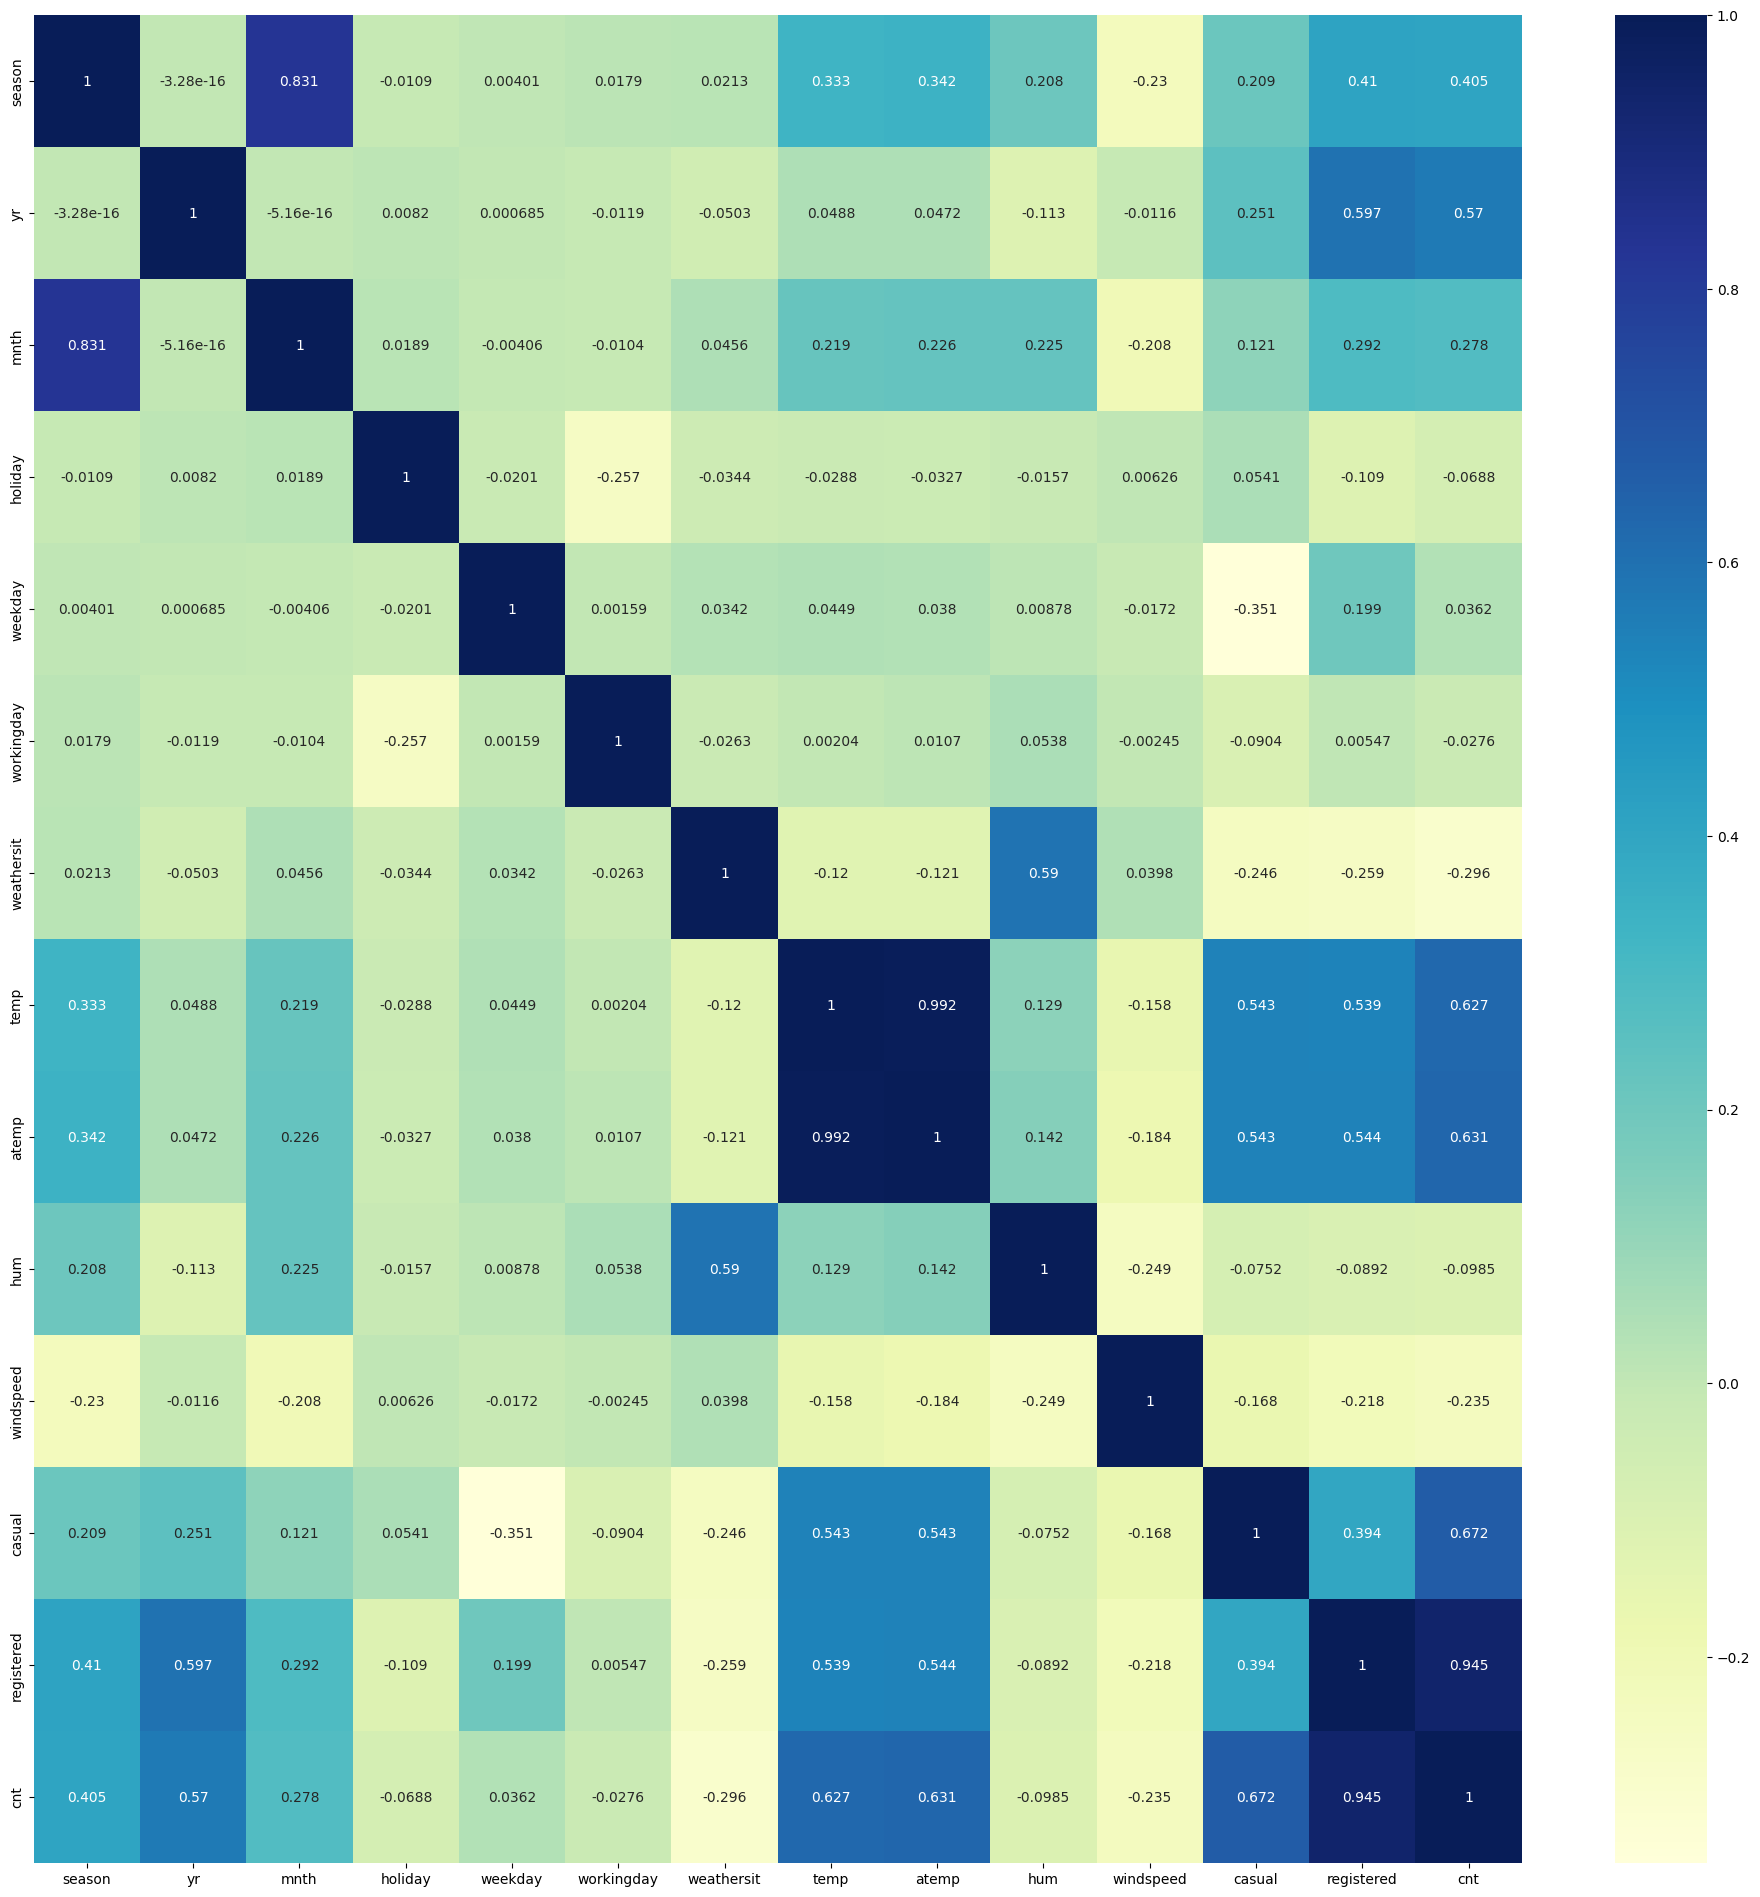

In [11]:
plt.figure(figsize = (24, 24))
sns.heatmap(df.corr(), annot = True, fmt='0.3g', cmap="YlGnBu")
plt.show()

Here are a few observations from the heat map:

* atemp shows the highest correlation with cnt after casual and registered, followed by temp.
* season has a moderate correlation with cnt, suggesting a decent relationship that is neither very high nor very low.
* yr is also correlated with cnt, indicating that it could be an important factor in explaining the demand.
* The correlation coefficient for mnth is relatively low. Further statistical analysis is needed, as it may be that only certain months are significant from a modeling perspective.
* holiday exhibits a negative correlation with cnt.
* Statistical significance should also be examined for weekday, workingday, weathersit, hum, and windspeed.

### Handling the categorical variables

In [12]:
# Mapping functions for season, weather, month, and weekday
def map_column(x, mapping):
    return x.map(mapping)

# Mappings for each column
season_mapping = {1: "spring", 2: "summer", 3: "fall", 4: "winter"}
weathersit_mapping = {i: f"weathersit_{i}" for i in range(1, 5)}
month_mapping = {i: f"month_{i}" for i in range(1, 13)}
weekday_mapping = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}

# Applying the mappings to the DataFrame columns
df["season"] = map_column(df["season"], season_mapping)
df["weathersit"] = map_column(df["weathersit"], weathersit_mapping)
df["mnth"] = map_column(df["mnth"], month_mapping)
df["weekday"] = map_column(df["weekday"], weekday_mapping)

In [13]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,month_1,0,Tuesday,1,weathersit_2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,month_1,0,Wednesday,1,weathersit_2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,month_1,0,Thursday,1,weathersit_1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,month_1,0,Friday,1,weathersit_1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,month_1,0,Saturday,1,weathersit_1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
# columns to plot and their corresponding labels
columns_to_plot = {
    'season': 'Season',
    'yr': 'Year',
    'mnth': 'Month',
    'holiday': 'Holiday',
    'weekday': 'Weekday',
    'workingday': 'Working Day',
    'weathersit': 'Weather Situation'
}

In [15]:

# Custom legend creation
legend_labels = {
    'season': ['Spring', 'Summer', 'Fall', 'Winter'],
    'yr': ['2011', '2012'],
    'mnth': [f'Month {i}' for i in range(1, 13)],
    'holiday': ['No Holiday', 'Holiday'],
    'weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'workingday': ['No Working Day', 'Working Day'],
    'weathersit': [
        'Clear, Few clouds, Partly cloudy',
        'Mist + Cloudy, Mist + Broken clouds',
        'Light Snow, Light Rain + Thunderstorm',
        'Heavy Rain + Ice Pellets + Mist'
    ]
}

### Plotting the catgorical variables

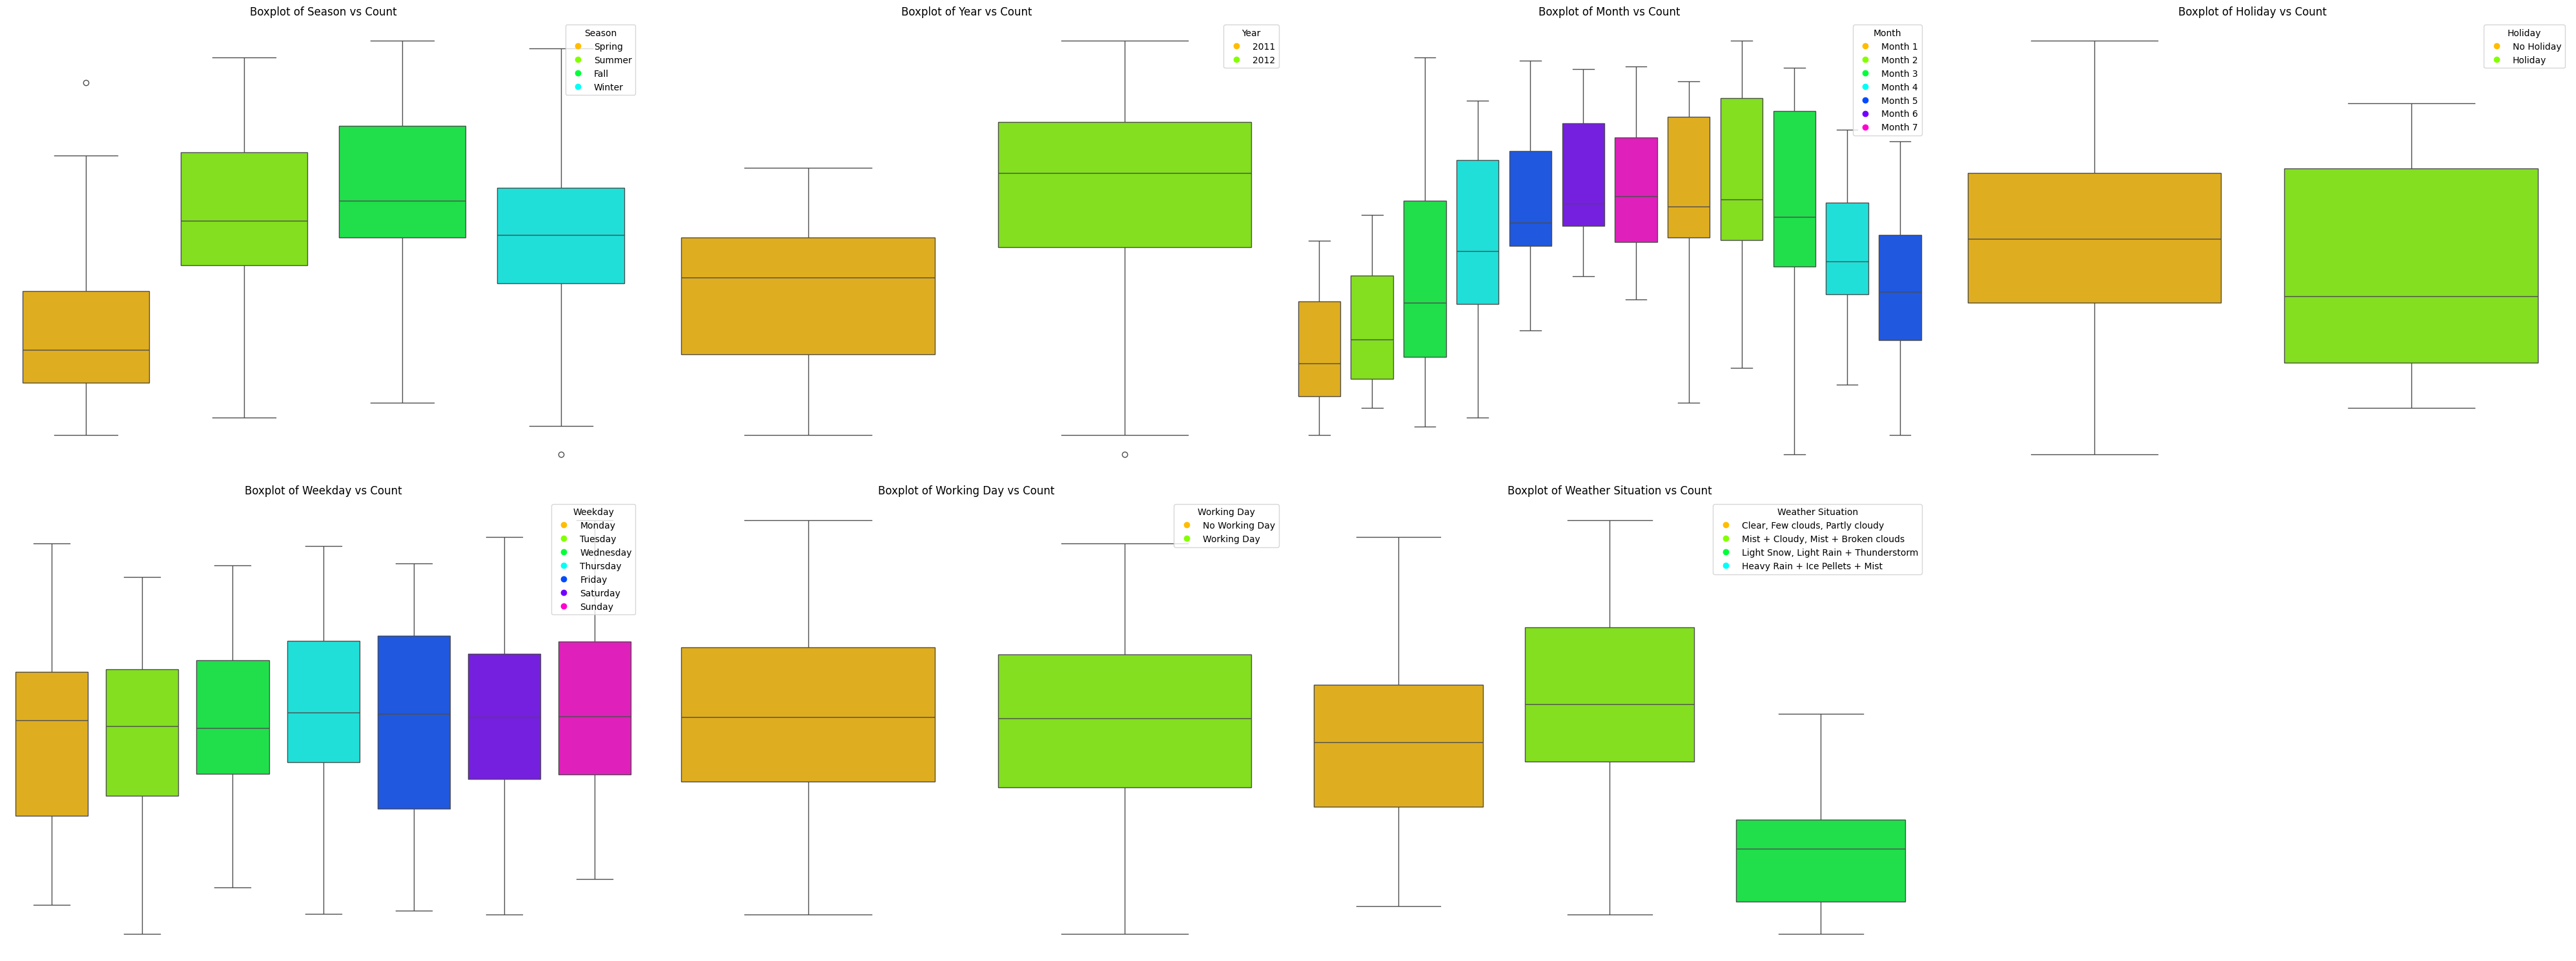

In [16]:
# Set the figure size and layout
plt.figure(figsize=(40, 15))

# subplot positions
positions = [(2, 4, i+1) for i in range(len(columns_to_plot))]

# Colors for each category (can be customized)
colors = sns.color_palette("hsv", len(columns_to_plot))

# Iterate over the columns and positions to create the subplots
for (col, label), pos in zip(columns_to_plot.items(), positions):
    plt.subplot(*pos)
    sns.boxplot(x=col, y='cnt', data=df, palette=colors)
    plt.title(f'Boxplot of {label} vs Count')

    # Remove x-axis labels to avoid clutter
    plt.xlabel('')
    plt.ylabel('')

# Create the legends separately
for i, (col, labels) in enumerate(legend_labels.items()):
    plt.subplot(2, 4, i+1)
    handles = [plt.Line2D([0], [0], color=color, marker='o', linestyle='', label=label)
               for color, label in zip(colors, labels)]
    plt.legend(handles=handles, title=columns_to_plot[col], loc='upper right')
    plt.axis('off')  # Turn off the axis for the legend plots

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Summary of the observations from the Box Plots:

* Fall Season: The median bike rental count is highest during the fall season.
Additionally, the maximum number of bike rentals also occurs in the fall. It’s worth exploring the statistical significance of this observation.

* Year 2019: Both the median and maximum bike rental counts are highest for the year 2019, indicating a potential peak in popularity or usage during that year.

* September: The highest bike rental count is recorded in September (Month 9).

* July: The median bike rental count peaks in July (Month 7), suggesting that this month consistently sees a high number of rentals.

* October: Interestingly, the lowest bike rental count is observed in October (Month 10).

* Non-Holiday Days: Bike rentals are significantly higher on non-holiday days (marked as 0). Both the median and maximum counts are highest on these days.

* Weekdays: The median bike rental count remains relatively consistent across all weekdays, indicating steady usage throughout the week.

* Working vs. Non-Working Days: There’s little difference in the median bike rental count between working and non-working days, suggesting that people rent bikes consistently regardless of their work schedule.

* Weather Condition 1: The best weather condition for bike rentals is when the weather is clear or partly cloudy (weathersit 1). This condition sees the highest median and maximum bike rental counts, while the lowest rentals occur during weather condition 3 (which involves light snow or light rain).








### Visualising the numerical variables using the pairplot to check the linear relationships

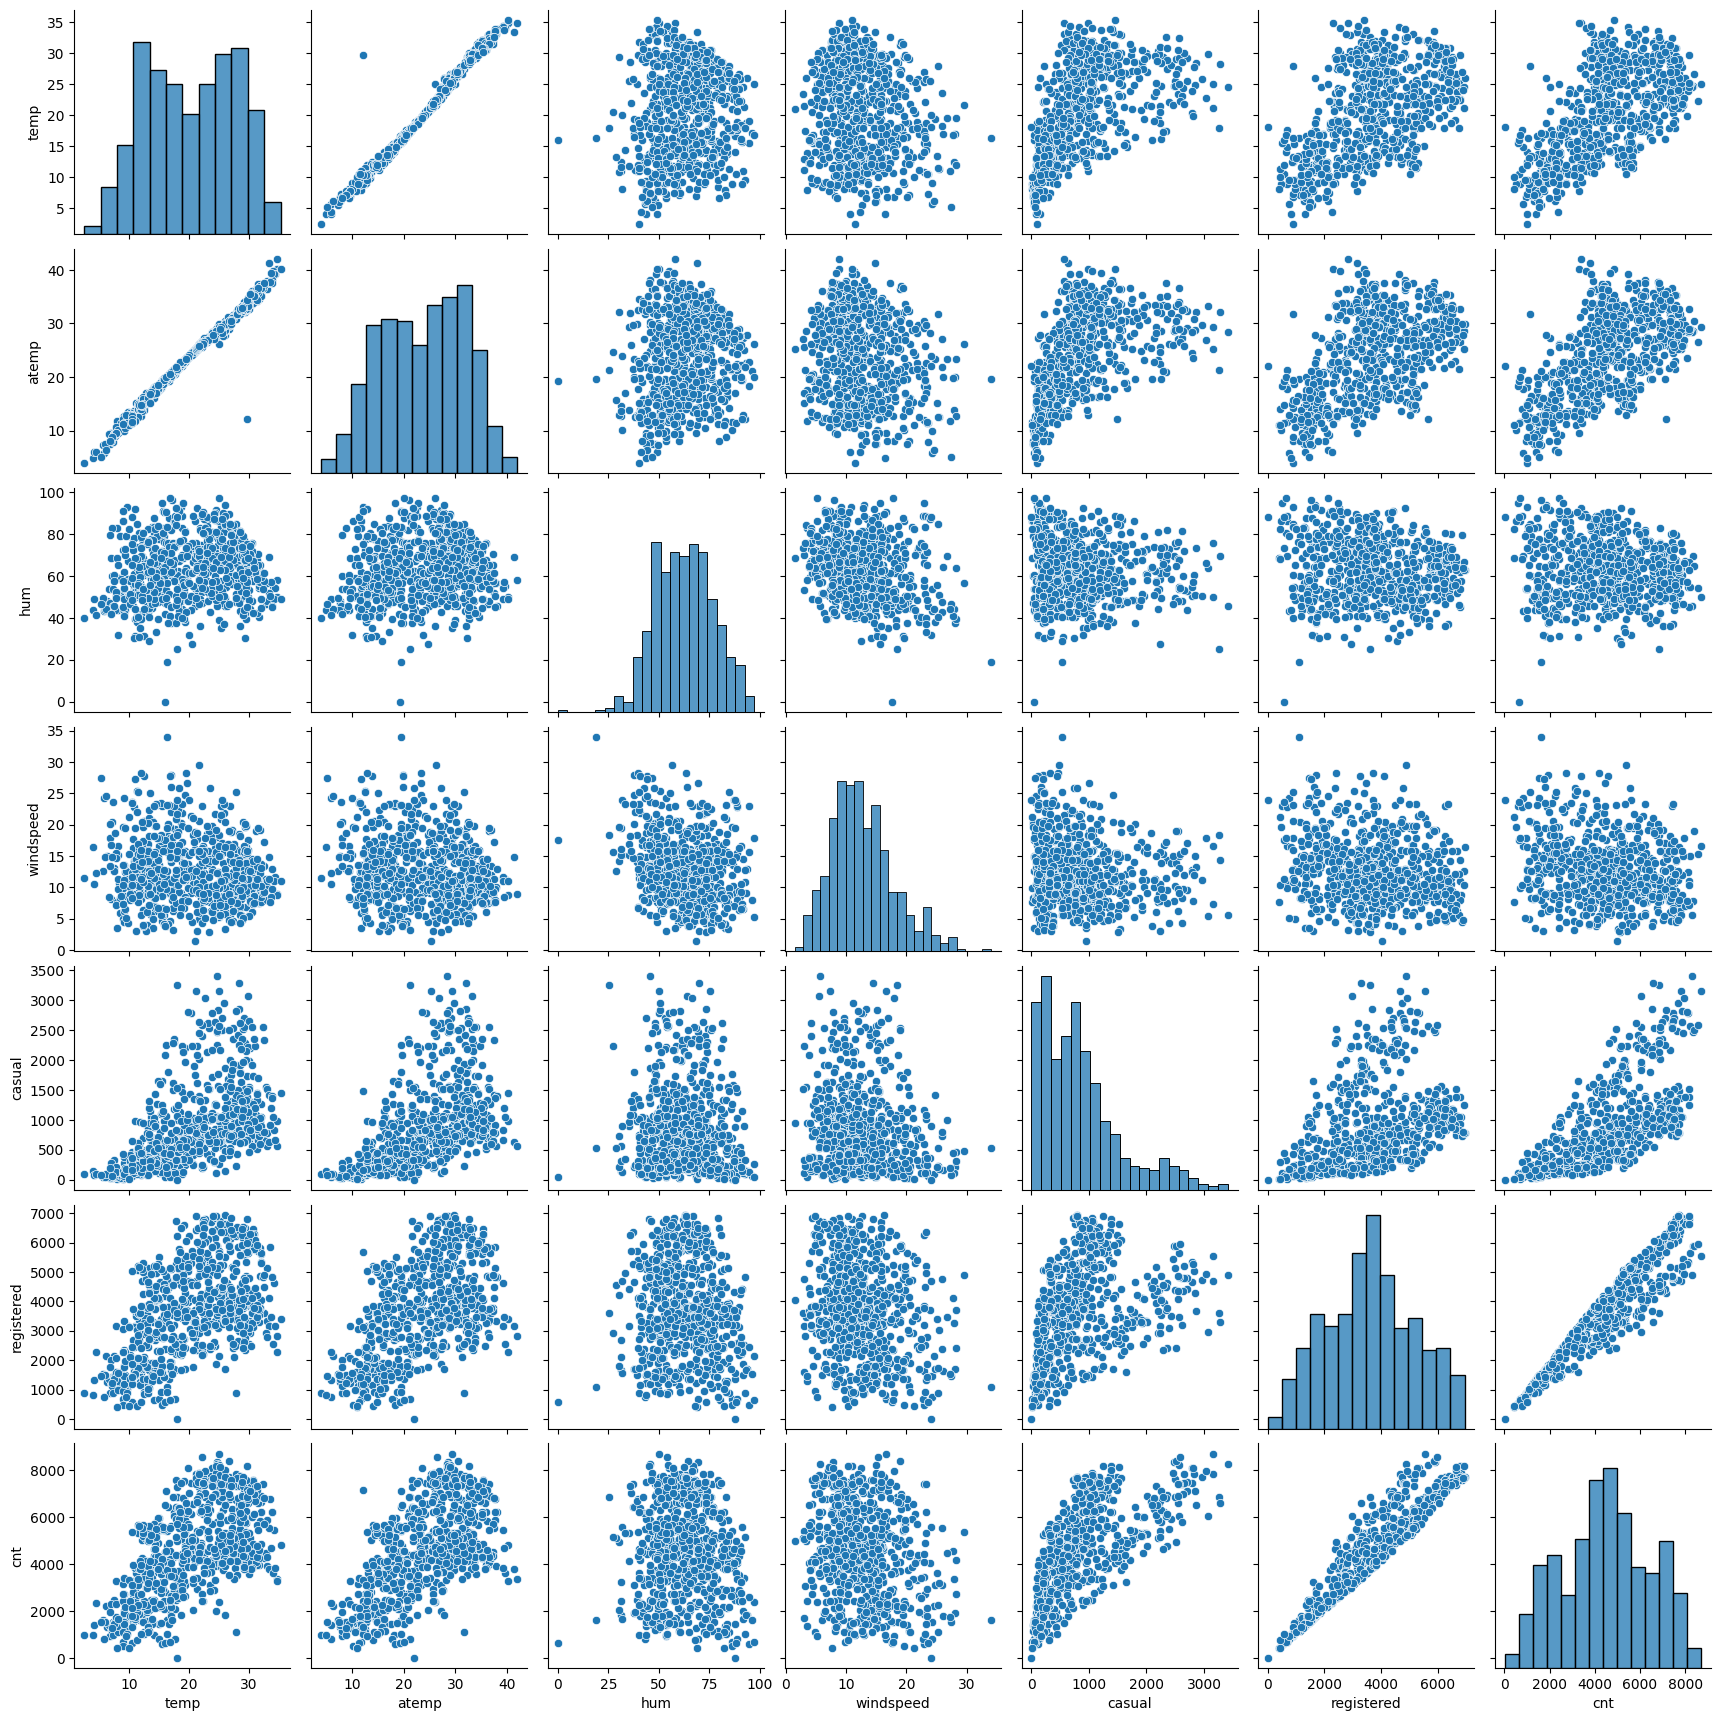

In [17]:
sns.pairplot(df[["temp","atemp","hum","windspeed","casual","registered","cnt"]])
plt.show()

## Observations from the pairplot:

* Temperature Correlation: Temperature (temp) and "feels like" temperature (atemp) are highly correlated, meaning they move closely together.

* Impact of Temperature: Temperature (temp) is also correlated with the number of casual riders, registered riders, and the total count (cnt) of bike rentals.

* "Feels Like" Temperature Correlation: The "feels like" temperature (atemp) shows a similar correlation with casual riders, registered riders, and the total rental count (cnt).

* Casual and Registered Riders: There’s a strong correlation between the number of casual riders and registered riders with the total rental count (cnt), which makes sense since casual + registered = cnt.

### Creating dummy variables for all of the categorical variables

In [18]:
# Define the columns for which we need to create dummy variables
columns_to_dummify = ["season", "weathersit", "mnth", "weekday"]

In [19]:
# Create and concatenate dummy variables for the specified columns
dummy_vars = pd.get_dummies(df[columns_to_dummify], drop_first=True, dtype=int)
df = pd.concat([df, dummy_vars], axis=1)

In [20]:
# Drop the original columns and other specified columns
columns_to_drop = columns_to_dummify + ["casual", "registered"]
df.drop(columns=columns_to_drop, inplace=True)

In [21]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_month_6,mnth_month_7,mnth_month_8,mnth_month_9,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,1,0,0,0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   yr                       730 non-null    int64  
 1   holiday                  730 non-null    int64  
 2   workingday               730 non-null    int64  
 3   temp                     730 non-null    float64
 4   atemp                    730 non-null    float64
 5   hum                      730 non-null    float64
 6   windspeed                730 non-null    float64
 7   cnt                      730 non-null    int64  
 8   season_spring            730 non-null    int64  
 9   season_summer            730 non-null    int64  
 10  season_winter            730 non-null    int64  
 11  weathersit_weathersit_2  730 non-null    int64  
 12  weathersit_weathersit_3  730 non-null    int64  
 13  mnth_month_10            730 non-null    int64  
 14  mnth_month_11            7

## Splitting the dataset into train and test

In [23]:
# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
# split the dataset in 70: 30 ratio for train and test
df_train, df_test = train_test_split(df, train_size = 0.70, test_size = 0.30, random_state = 333)

In [24]:
scaler = MinMaxScaler()

In [25]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_weathersit_2', 'weathersit_weathersit_3', 'mnth_month_10',
       'mnth_month_11', 'mnth_month_12', 'mnth_month_2', 'mnth_month_3',
       'mnth_month_4', 'mnth_month_5', 'mnth_month_6', 'mnth_month_7',
       'mnth_month_8', 'mnth_month_9', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

In [26]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [27]:
y_train = df_train.pop('cnt')
X_train = df_train

In [28]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# Initialize RFE with the linear model and specify the number of features to select
rfe = RFE(estimator=lm, n_features_to_select=18)
rfe = rfe.fit(X_train, y_train)

In [29]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 6),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', True, 1),
 ('weathersit_weathersit_2', True, 1),
 ('weathersit_weathersit_3', True, 1),
 ('mnth_month_10', True, 1),
 ('mnth_month_11', False, 8),
 ('mnth_month_12', False, 9),
 ('mnth_month_2', False, 5),
 ('mnth_month_3', True, 1),
 ('mnth_month_4', True, 1),
 ('mnth_month_5', True, 1),
 ('mnth_month_6', True, 1),
 ('mnth_month_7', False, 12),
 ('mnth_month_8', False, 2),
 ('mnth_month_9', True, 1),
 ('weekday_Monday', True, 1),
 ('weekday_Saturday', False, 11),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 7),
 ('weekday_Tuesday', False, 4),
 ('weekday_Wednesday', False, 3)]

In [30]:
# Get the names of the features that were selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'weathersit_weathersit_2',
       'weathersit_weathersit_3', 'mnth_month_10', 'mnth_month_3',
       'mnth_month_4', 'mnth_month_5', 'mnth_month_6', 'mnth_month_9',
       'weekday_Monday', 'weekday_Sunday'],
      dtype='object')

In [31]:
# Get the names of the features that were not selected by RFE
X_train.columns[~rfe.support_]

Index(['holiday', 'season_summer', 'mnth_month_11', 'mnth_month_12',
       'mnth_month_2', 'mnth_month_7', 'mnth_month_8', 'weekday_Saturday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [32]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [33]:
# Calculate the VIFs for the new model
def calculate_VIF(col,X_train):
    vif = pd.DataFrame()
    vif['Features'] = col
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    display(vif)

## Residual analysis

## Model 1

In [34]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [35]:
# Running the 1st linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [36]:
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     143.5
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.61e-182
Time:                        07:40:21   Log-Likelihood:                 506.93
No. Observations:                 510   AIC:                            -975.9
Df Residuals:                     491   BIC:                            -895.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [37]:
#Calculate VIF
calculate_VIF(col,X_train)

,Features,VIF
2,temp,381.11
3,atemp,370.75
4,hum,31.08
1,workingday,20.69
5,windspeed,6.50
17,weekday_Sunday,5.01
16,weekday_Monday,4.90
6,season_spring,4.25
7,season_winter,3.91
8,weathersit_weathersit_2,2.33


## Model 2

In [38]:
X_train_new = X_train[col].drop(["atemp"], axis = 1)

In [39]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

In [40]:
lm_2 = sm.OLS(y_train,X_train_lm).fit()   # Running the 2nd linear model

In [41]:
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     152.1
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.53e-183
Time:                        07:40:22   Log-Likelihood:                 506.73
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     492   BIC:                            -901.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [42]:
calculate_VIF(X_train_new.columns,X_train_new)

,Features,VIF
3,hum,31.04
1,workingday,20.67
2,temp,17.85
4,windspeed,6.19
16,weekday_Sunday,5.01
15,weekday_Monday,4.89
5,season_spring,4.20
6,season_winter,3.81
7,weathersit_weathersit_2,2.33
0,yr,2.06


## Model 3

In [43]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [44]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

In [45]:
lm_3 = sm.OLS(y_train,X_train_lm).fit()   # Running the 3rd linear model

In [46]:
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     160.8
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          8.15e-184
Time:                        07:40:22   Log-Likelihood:                 505.25
No. Observations:                 510   AIC:                            -976.5
Df Residuals:                     493   BIC:                            -904.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [47]:
calculate_VIF(X_train_new.columns,X_train_new)

,Features,VIF
2,hum,25.10
1,temp,15.35
3,windspeed,5.68
4,season_spring,3.59
5,season_winter,3.46
6,weathersit_weathersit_2,2.27
0,yr,2.06
8,mnth_month_10,1.65
10,mnth_month_4,1.58
11,mnth_month_5,1.50


## Model 4

In [48]:
X_train_new = X_train_new.drop(["weekday_Monday"], axis = 1)

In [49]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

In [50]:
lm_4 = sm.OLS(y_train,X_train_lm).fit()   # Running the  4th linear model

In [51]:
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     170.5
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          3.10e-184
Time:                        07:40:22   Log-Likelihood:                 503.56
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     494   BIC:                            -907.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [52]:
calculate_VIF(X_train_new.columns,X_train_new)

,Features,VIF
2,hum,25.08
1,temp,15.28
3,windspeed,5.67
4,season_spring,3.57
5,season_winter,3.43
6,weathersit_weathersit_2,2.26
0,yr,2.06
8,mnth_month_10,1.65
10,mnth_month_4,1.58
11,mnth_month_5,1.50


In [53]:
X_train_new = X_train_new.drop(["weekday_Sunday"], axis = 1)

In [54]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

In [55]:
lm_5 = sm.OLS(y_train,X_train_lm).fit()   # Running the 5th linear model

In [56]:
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     181.9
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          8.61e-185
Time:                        07:40:22   Log-Likelihood:                 502.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     495   BIC:                            -910.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [57]:
calculate_VIF(X_train_new.columns,X_train_new)

,Features,VIF
2,hum,25.08
1,temp,15.24
3,windspeed,5.67
4,season_spring,3.57
5,season_winter,3.43
6,weathersit_weathersit_2,2.26
0,yr,2.06
8,mnth_month_10,1.64
10,mnth_month_4,1.58
11,mnth_month_5,1.50


## Residual Analysis of the train data

### Model Evaluation

In [58]:
y_train_cnt = lm_5.predict(X_train_lm)

In [59]:
## Looking at the RMSE

#Returns the mean squared error
np.sqrt(mean_squared_error(y_train, y_train_cnt))

0.09039275029799687

Text(0.5, 0, 'Errors')

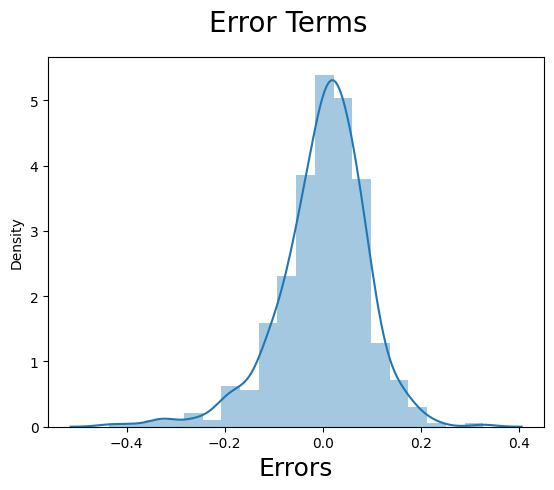

In [60]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

The residuals are distributed normally with a mean of zero.

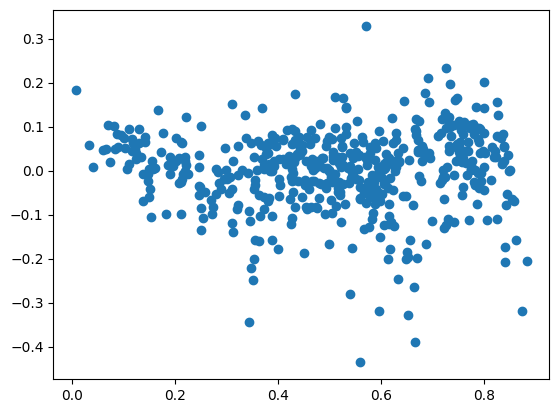

In [61]:
plt.scatter(y_train_cnt,(y_train - y_train_cnt))
plt.show()

Plot of residuals versus predicted values should show a random scatter without any funneling or patterns. This means that there is no correlation between the residuals and the predicted values.

In [62]:
# Apply scaler() to all the columns except the '0-1' and 'dummy' variables
num_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [63]:
y_test = df_test.pop('cnt')
X_test = df_test

In [64]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [65]:
# Making predictions
y_pred = lm_5.predict(X_test_new)

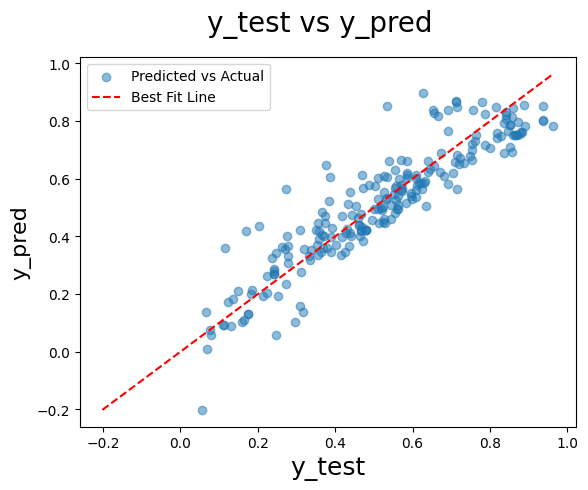

In [66]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')

# Adding a best-fit line (45-degree line)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Best Fit Line')

# Adding titles and labels
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.legend()
plt.show()

In [67]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.09112793536951304

In [68]:
R2 = r2_score(y_test, y_pred)
R2

0.8275629596461039

In [69]:
adj_R2 = 1-(1-R2)*(219-1)/(219-12-1)
adj_R2

0.8175180835089838

In [70]:
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     181.9
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          8.61e-185
Time:                        07:40:24   Log-Likelihood:                 502.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     495   BIC:                            -910.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [71]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.09112793536951304

In [72]:
summary_df = pd.DataFrame({"Model Performance Metrics":["R-Squared Value","Adjusted R-Squared Value","Percentage Difference"],
                         "Train Set":[0.837,0.833,0.4],
                         "Test Set":[0.827,0.817,1]})

In [73]:
summary_df

,Model Performance Metrics,Train Set,Test Set
0,R-Squared Value,0.837,0.827
1,Adjusted R-Squared Value,0.833,0.817
2,Percentage Difference,0.400,1.000


## Summary of the model performance metrics:

* **R-Squared Value:** The R-squared value is 0.837 for the training set and 0.827 for the test set. This indicates that the model explains approximately 83.7% of the variance in the training data and about 82.7% of the variance in the test data. The slight decrease in R-squared from training to test set suggests that the model generalizes well but has a minor drop in performance on unseen data.

* **Adjusted R-Squared Value:** The adjusted R-squared is 0.833 for the training set and 0.817 for the test set. Adjusted R-squared accounts for the number of predictors in the model, providing a more accurate measure of goodness-of-fit by adjusting for the complexity of the model. The drop from 0.833 to 0.817 indicates that while the model performs well, it has a slight decrease in performance when applied to the test set, which is expected as it reflects the model’s ability to generalize.

* **Percentage Difference:** The percentage difference between training and test R-squared values is 0.4% for the R-squared value and 1% for the adjusted R-squared value. These small differences suggest that the model’s performance is quite stable across both the training and test datasets, showing good generalizability and robustness.

Overall, the metrics indicate that the model performs consistently with only minor variations between the training and test sets, suggesting that it is well-tuned and generalizes effectively to new data.